In [1]:
import pandas as pd

poll = pd.read_csv("2017_jun_final.csv")
poll.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


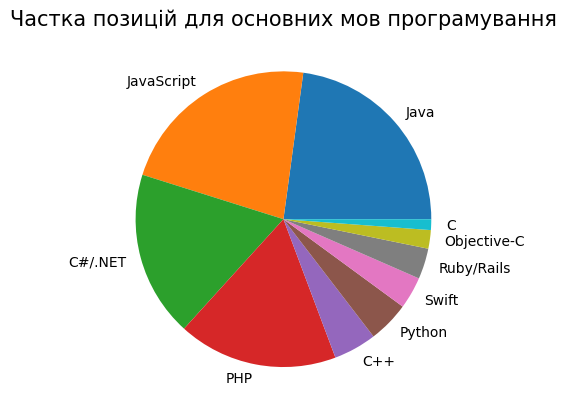

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

by_language = poll.groupby('Язык.программирования', group_keys=False).agg({'Язык.программирования' : ['count']}).rename(columns={'Язык.программирования': 'Количество'}).apply(lambda x: x.sort_values(ascending=False))
labels = by_language.index.tolist()[:10]
data = by_language.values.flatten().tolist()[:10]
plt.pie(data, labels=labels)
plt.title("Частка позицій для основних мов програмування", fontsize=15)
plt.show()

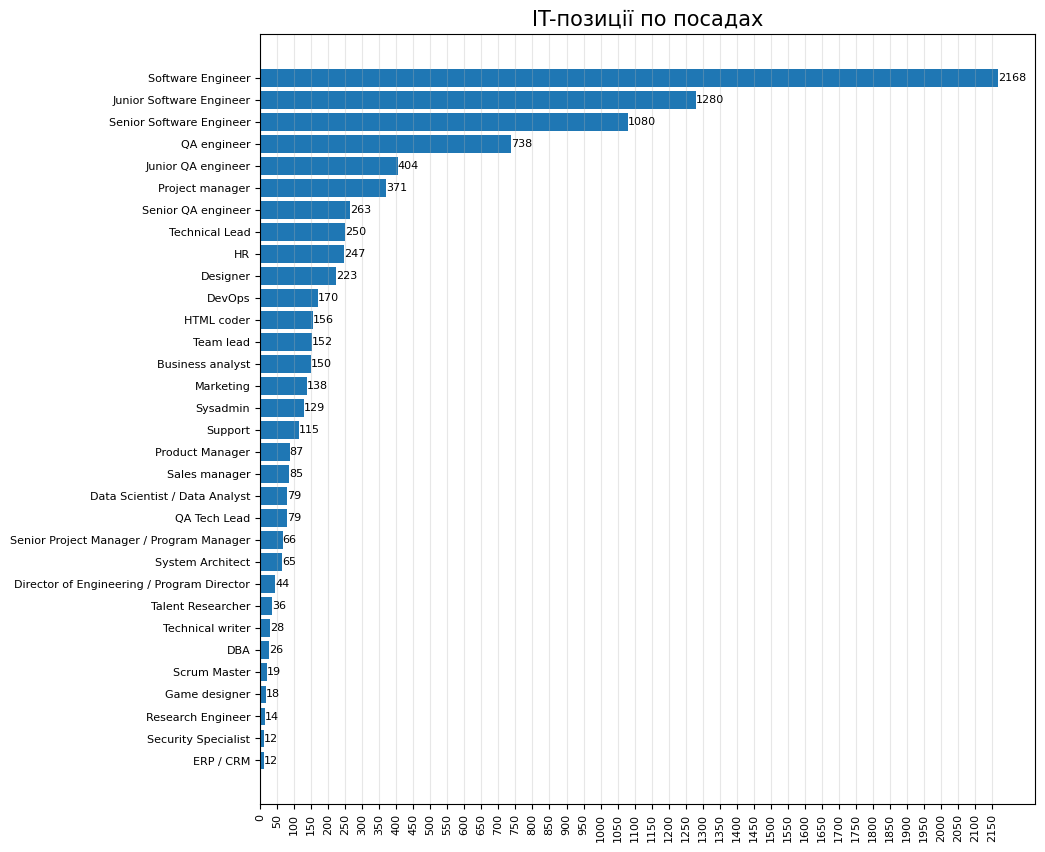

In [6]:
by_position = poll.groupby('Должность', group_keys=False).agg({'Должность' : ['count']}).rename(columns={'Должность': 'Количество'}).apply(lambda x: x.sort_values())
fig, ax = plt.subplots()
bars = ax.barh(by_position.index.tolist(), by_position.values.flatten().tolist())
ax.bar_label(bars, fontsize=8)
plt.title("IT-позиції по посадах", fontsize=15)
plt.xticks(range(0, 2200, 50), fontsize=8, rotation='vertical')
plt.yticks(fontsize=8)
plt.grid(axis='x', alpha=0.3)
fig.set_size_inches(10, 10)
plt.show()

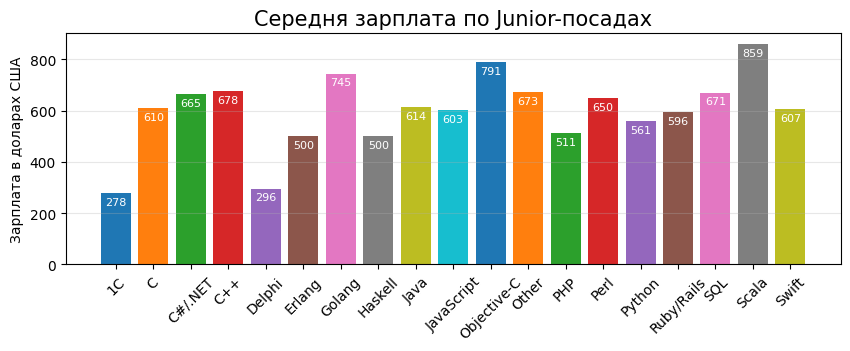

In [10]:
juniors = poll[poll['Должность']=='Junior Software Engineer']
avg_salary = juniors.groupby(['Язык.программирования']).agg({'Зарплата.в.месяц' : ['mean']}).rename(columns={'Зарплата.в.месяц': 'avg'}).round(0).astype(int).apply(lambda x: x.sort_index())
fig, ax = plt.subplots()
bars = ax.bar(avg_salary.index.tolist(), avg_salary.values.flatten().tolist(), 
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
ax.bar_label(bars, fontsize=8, padding=-10, color='white')
plt.title("Середня зарплата по Junior-посадах", fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.ylabel('Зарплата в доларах США')
fig.set_size_inches(10, 3)
plt.show()